In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\USER\Desktop\projects\project3_sarima\AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
from datetime import datetime

In [8]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace= True)

In [9]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


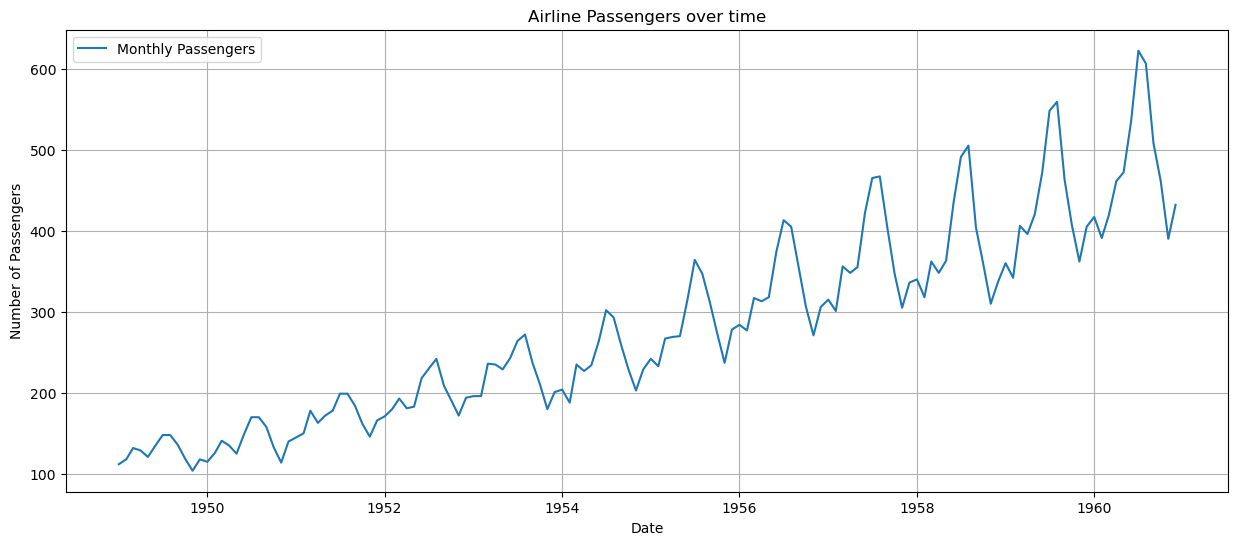

In [10]:
plt.figure(figsize=(15,6))

plt.plot(df['Passengers'], label = 'Monthly Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Airline Passengers over time')
plt.grid(True)
plt.legend()
plt.tight_layout
plt.show()

##### 🔍 Step 2: Time Series Decomposition
We’ll decompose the series into:

- Trend

- Seasonality

- Residuals (noise)

This helps us confirm the seasonality visually before modeling.

Here’s the annotated code for decomposition using seasonal_decompose:

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

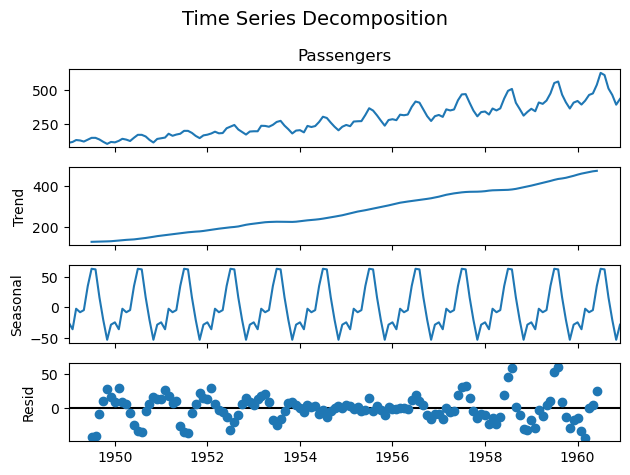

In [12]:
result = seasonal_decompose(df['Passengers'], model = 'Multiplicative', period = 12)

result.plot()
plt.suptitle('Time Series Decomposition', fontsize=14)
plt.tight_layout()
plt.show()

##### Stationary check using ADF

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
adf_result = adfuller(df['Passengers'])
print(f'ADF Statistic:', adf_result[0])
print(f'P-Value:', adf_result[1])

for key, value in adf_result[4].items():
    print(f'Critical value ({key}): {value}')

ADF Statistic: 0.8153688792060597
P-Value: 0.9918802434376411
Critical value (1%): -3.4816817173418295
Critical value (5%): -2.8840418343195267
Critical value (10%): -2.578770059171598


#### 🔁 Step 4: Differencing to Achieve Stationarity
Since the series is non-stationary, we’ll apply first-order differencing to remove the trend component.

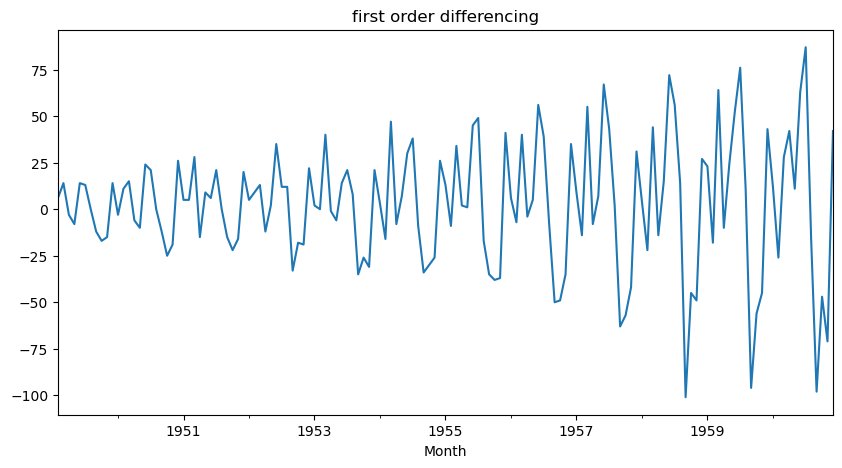

In [16]:
#FIRST DIFFERENCING
#df_diff = df['Passengers'] - df['Passengers'].shift(1)
#OR
df_diff = df['Passengers'].diff().dropna()

#plot 
df_diff.plot(title = 'first order differencing', figsize=(10,5))
plt.show()

#### RERUN ADF CHECK

In [17]:
adf_result_diff = adfuller(df_diff)
print(f'ADF Statistic:', adf_result_diff[0])
print(f'P-Value:', adf_result_diff[1])

for key, value in adf_result_diff[4].items():
    print(f'Critical value ({key}): {value}')

ADF Statistic: -2.829266824169992
P-Value: 0.0542132902838265
Critical value (1%): -3.4816817173418295
Critical value (5%): -2.8840418343195267
Critical value (10%): -2.578770059171598


#### 🔁 Step 4b: Second-Order Differencing

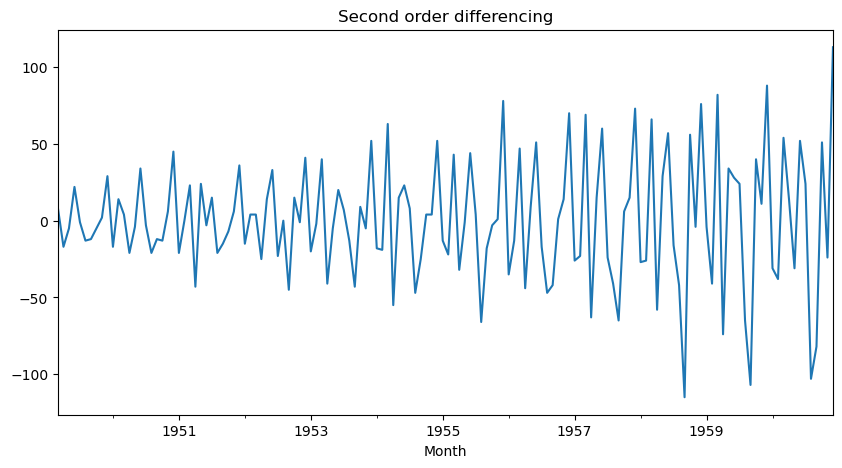

In [18]:
df_diff2 = df_diff.diff().dropna()

df_diff2.plot(title='Second order differencing', figsize=(10,5))
plt.show()

#### RERUN ADF CHECK AGAIN

In [19]:
adf_result_diff2 = adfuller(df_diff2)
print(f'ADF Statistic:', adf_result_diff2[0])
print(f'P-Value:', adf_result_diff2[1])

for key, value in adf_result_diff2[4].items():
    print(f'Critical value ({key}): {value}')

ADF Statistic: -16.384231542468527
P-Value: 2.732891850014085e-29
Critical value (1%): -3.4816817173418295
Critical value (5%): -2.8840418343195267
Critical value (10%): -2.578770059171598


#### ✅ Step 5: ACF and PACF Analysis

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

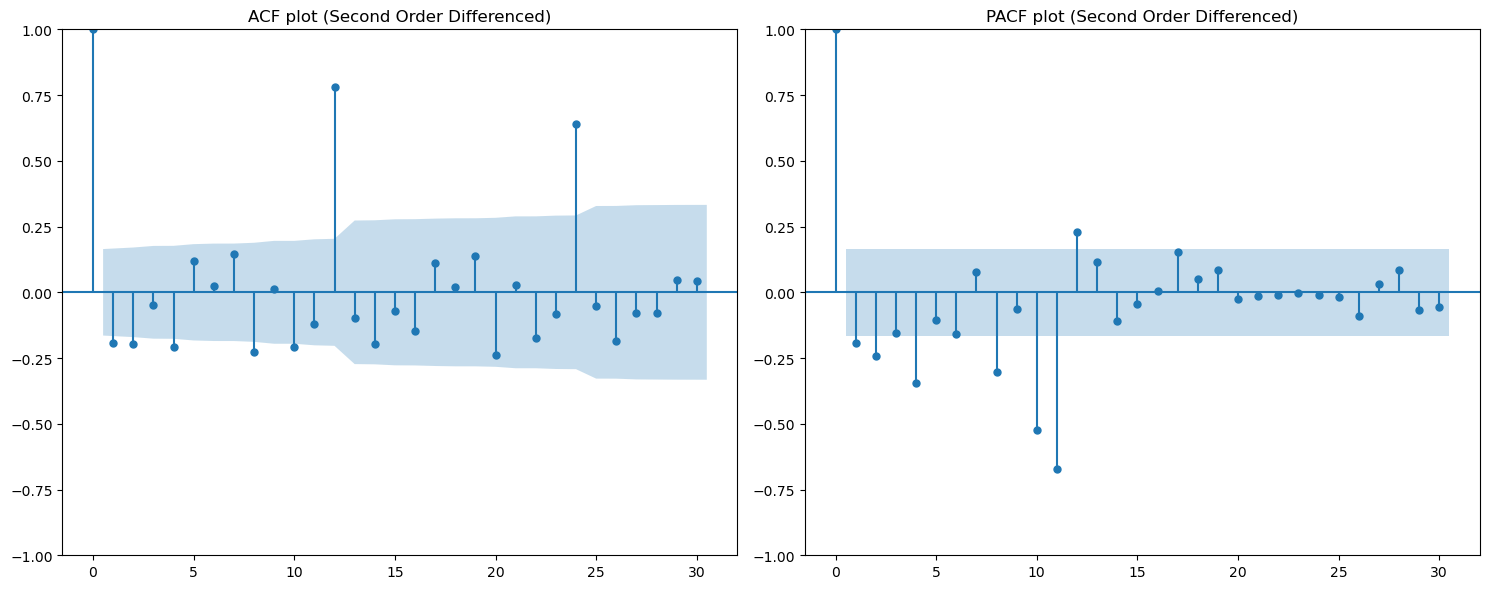

In [23]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plot_acf(df_diff2, lags=30, ax = plt.gca())
plt.title('ACF plot (Second Order Differenced)')

plt.subplot(1,2,2)
plot_pacf(df_diff2, lags = 30, ax=plt.gca())
plt.title('PACF plot (Second Order Differenced)')

plt.tight_layout()
plt.show()

#### ✅ Step 6: Fit the ARIMA Model

In [24]:
from statsmodels.tsa.arima.model import ARIMA

In [25]:
model = ARIMA(df['Passengers'], order = (7,2,7))
results = model.fit()

print(results.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(7, 2, 7)   Log Likelihood                -651.828
Date:                Tue, 17 Jun 2025   AIC                           1333.656
Time:                        11:44:51   BIC                           1377.993
Sample:                    01-01-1949   HQIC                          1351.673
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5171      0.116     -4.443      0.000      -0.745      -0.289
ar.L2         -0.2531      0.122     -2.081      0.037      -0.492      -0.015
ar.L3         -0.4099      0.118     -3.468      0.0

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### ✅ Model Summary Interpretation
###### 📉 AIC = 1333.656
- Lower than your previous models (which were above 1380+), so this model performs better in terms of AIC.

###### ✅ Good indicator!

###### ⚙️ Coefficients
- Several AR/MA terms are statistically insignificant (p-values > 0.05), especially the MA terms.

- This suggests that while the model fits the data well in terms of AIC, it might be overfitting with too many parameters.

###### 📊 Ljung-Box Test (Q = 0.00, p = 0.95)
- High p-value → residuals are not autocorrelated. ✅

###### 🧪 Jarque-Bera Test (p = 0.25)
- p > 0.05 → residuals are approximately normally distributed. ✅

###### ⚠️ Heteroskedasticity (H = 7.28, p = 0.00)
- This is a red flag. The variance of residuals is not constant, meaning the model may not generalize well for forecasting.

#### ✅ Summary of Diagnostics

| Test                     | Result             | Interpretation                    |
| ------------------------ | ------------------ | --------------------------------- |
| AIC                      | **1333.656**       | 🔽 Very good                      |
| Residual autocorrelation | ❌ Not present (✅)  | Residuals look white-noise ✅      |
| Normality (JB test)      | ✅ Normal residuals | Model behaves well statistically  |
| Heteroskedasticity       | ❌ Present          | Residual variance not constant ⚠️ |


#### 🔍 Next Step: Residual Diagnostic Plots

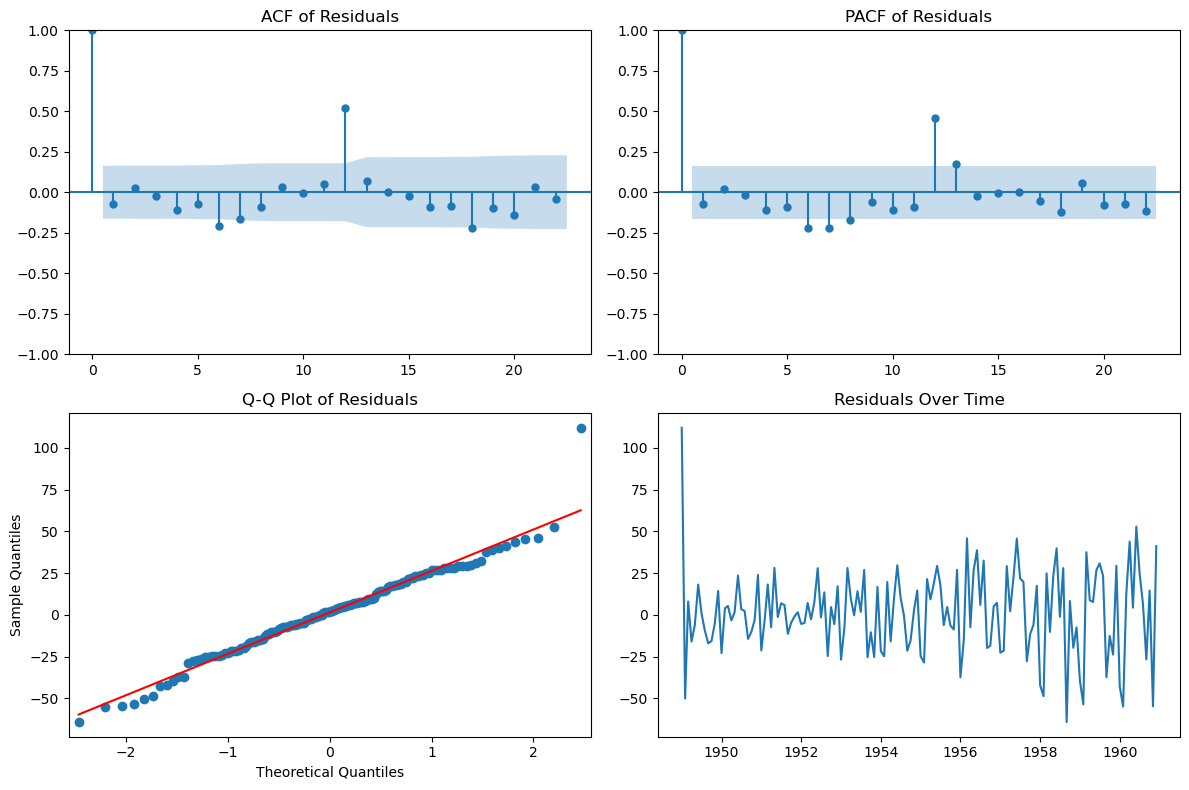

In [26]:
import statsmodels.api as sm

residuals = results.resid

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
sm.graphics.tsa.plot_acf(residuals, ax=ax[0, 0])
ax[0, 0].set_title('ACF of Residuals')

sm.graphics.tsa.plot_pacf(residuals, ax=ax[0, 1])
ax[0, 1].set_title('PACF of Residuals')

sm.qqplot(residuals, line='s', ax=ax[1, 0])
ax[1, 0].set_title('Q-Q Plot of Residuals')

ax[1, 1].plot(residuals)
ax[1, 1].set_title('Residuals Over Time')
plt.tight_layout()
plt.show()

#### ✅ Interpretation of Your Diagnostics

| Plot                      | Observation                                                 | What It Means                                      |
| ------------------------- | ----------------------------------------------------------- | -------------------------------------------------- |
| **ACF/PACF of residuals** | One significant spike at lag 12                             | Suggests possible **seasonality left** ⚠️          |
| **Q-Q plot**              | Residuals mostly follow the line with one outlier           | **Residuals are approximately normal** ✅           |
| **Residuals over time**   | Residuals fluctuate around zero with roughly equal variance | **No trend or heteroskedasticity seen visually** ✅ |


##### ⚠️ Key Note on the Lag-12 Spike
A spike at lag 12 in residual ACF suggests yearly seasonality is not fully captured.

Since this dataset is monthly airline passengers, it makes sense that seasonality at lag 12 exists.

We might need to upgrade to SARIMA to explicitly model seasonal patterns.

##### 🔄 Two Options Now:
- ✅ Option A: Continue with ARIMA(7,2,7) (already decent)
Proceed to forecast, evaluate with MAE, RMSE, and MAPE.

- 🔁 Option B: Move to SARIMA to address seasonality explicitly
Fit a SARIMA model like SARIMA(p,d,q)(P,D,Q,12)

Given your ACF/PACF feedback and seasonal data context, I recommend:

###### ✅ Let’s proceed to SARIMA to capture seasonality properly.


#### 🚀 Next Step: Fit SARIMA

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [28]:
#Let’s try:
model = SARIMAX(df['Passengers'],order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

print(results.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Tue, 17 Jun 2025   AIC                           1022.299
Time:                                    12:09:01   BIC                           1036.675
Sample:                                01-01-1949   HQIC                          1028.140
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.357      0.721      -0.825       0.570
ma.L1         -0.2149      0.325   

#### ✅ Interpretation of Model Output

| Metric                 | Value                      | Interpretation                                               |
| ---------------------- | -------------------------- | ------------------------------------------------------------ |
| **AIC**                | 1022.299                   | ✅ Much lower than ARIMA’s 1333.66 – this model is better     |
| **Seasonal AR (12)**   | -0.9272, p < 0.001         | Significant seasonal component                               |
| **Seasonal MA (12)**   | +0.8395, p = 0.007         | Also significant                                             |
| **Non-seasonal AR/MA** | Not significant (p > 0.05) | That’s okay — seasonality is the key driver here             |
| **Ljung-Box (L1)**     | 0.00 (p = 0.99)            | ✅ Residuals are white noise (no autocorrelation)             |
| **Jarque-Bera (JB)**   | 7.05 (p = 0.03)            | Mild deviation from normality — usually acceptable           |
| **Heteroskedasticity** | 2.65 (p = 0.00)            | Some variance instability — we’ll verify with residual plots |


#### 📌 Next Step: Residual Diagnostics

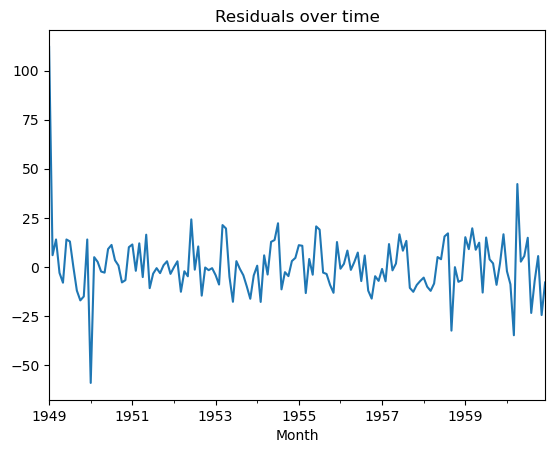

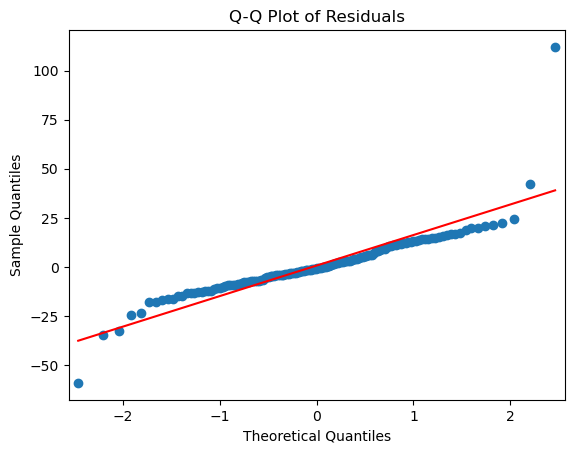

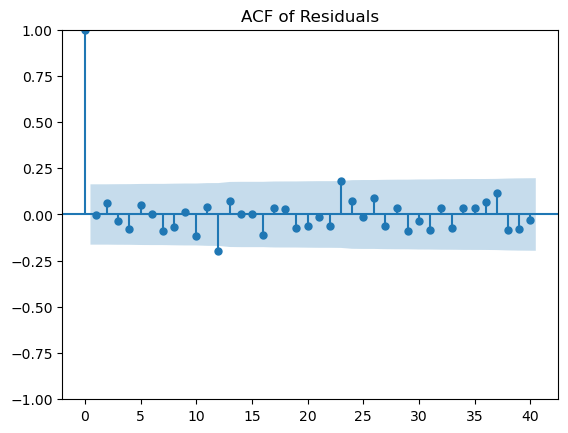

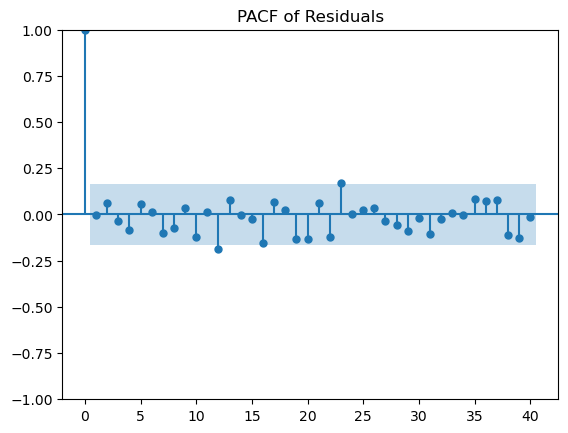

In [29]:
# Plot residuals
residuals = results.resid

# 1. Residual over time
residuals.plot(title="Residuals over time")
plt.show()

# 2. Q-Q Plot
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

# 3. ACF and PACF of residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(residuals, lags=40)
plt.title("ACF of Residuals")
plt.show()

plot_pacf(residuals, lags=40)
plt.title("PACF of Residuals")
plt.show()


Perfect. Since you've completed the residual diagnostics and confirmed earlier that:

- Q-Q plot shows residuals close to the trend line with slight deviation (acceptable),

- Residual ACF and PACF show no major autocorrelation (white noise),

- Residuals over time are roughly centered around zero (no trend or variance issues),

###### ✅ We can conclude that the SARIMA(1,1,1)(1,1,1,12) model is a good fit for the airline passengers data.

#### ✅ Next Step: Forecasting and Evaluation
We’ll now:

- Forecast the next 12 months

- Plot the forecast vs actual

- Evaluate with MAE, RMSE, and MAPE

#### 📦 1. Forecasting Next 12 Months
Run the following code to forecast and visualize:

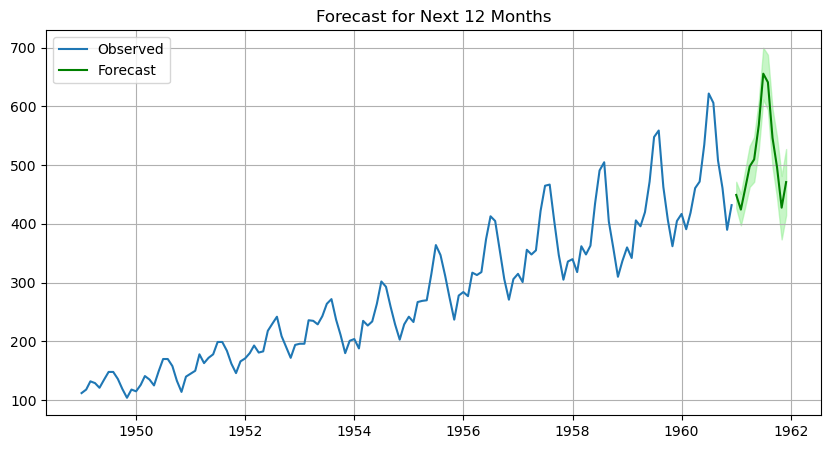

In [30]:
#FORECAST NEXT 12 MONTH

n_steps = 12
forecast = results.get_forecast(steps=n_steps)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df['Passengers'], label='Observed')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='green')
plt.fill_between(forecast_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='lightgreen', alpha=0.5)
plt.title("Forecast for Next 12 Months")
plt.legend()
plt.grid(True)
plt.show()

#### 📏 2. Evaluation Metrics (if you have actual future values)
If you have the true values for the next 12 months (e.g. manually added to df or saved separately), run this to evaluate:

In [ ]:
'''
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Replace this with your actual values
actual = np.array([...])  # actual 12 months values
predicted = forecast_mean.values

mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
'''


##### 🔹 If you're evaluating the forecast on unseen (future) data:
Then NO, df['Passengers'] refers to the historical/observed values (from 1949 to 1960 in the Airline dataset). If your model forecasts the next 12 months, and those months are not part of df, then:

- The true values must come from outside the model training data — such as a new file or manually entered data (real passengers count for 1961).

- If you don’t have actual future values (e.g. for 1961), you can't compute MAE/RMSE/MAPE accurately. You can only visualize the forecast.

##### 🔹 If you split the data for training and testing (e.g. 1949–1959 train, 1960 test):
Then YES — the last 12 values of df['Passengers'] could be treated as the “true” test values, and you compare them to forecasts generated from training data only.



We'll now evaluate your SARIMA model properly using a train/test split. Here's a complete step-by-step breakdown and the code to follow:

#### ✅ Step-by-step Plan
- 1. Split your data

Use 1949–1959 as training (first 132 months)

Use 1960 as testing (last 12 months)

- 2. Fit SARIMA on training set

- 3. Forecast 12 steps ahead

- 4. Compare predicted vs actual values from test set

- 5. Calculate MAE, RMSE, and MAPE

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE: 16.67
RMSE: 21.62
MAPE: 3.76%


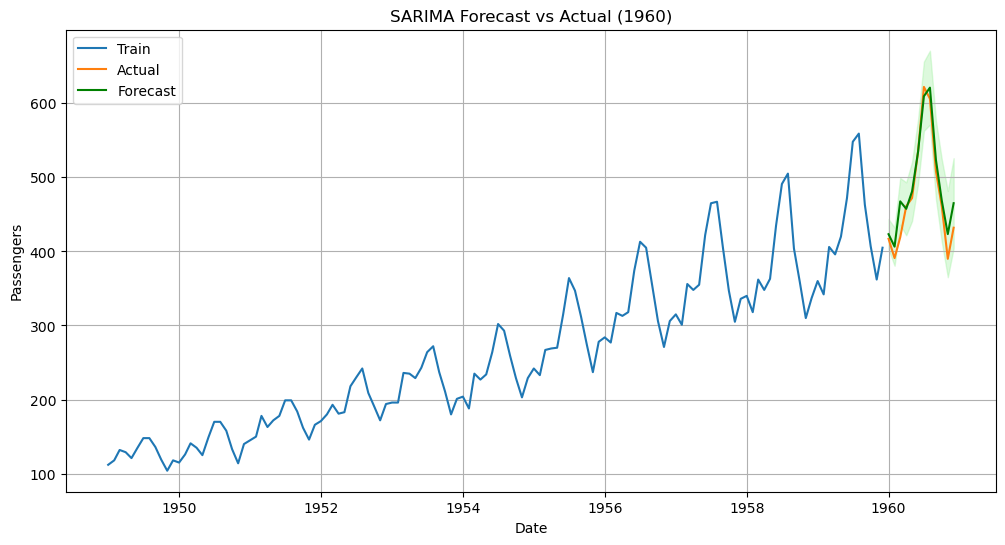

In [35]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# STEP 1: Load your data (assume 'df' is already loaded with 'Passengers' column and datetime index)
train = df.iloc[:-12]
test = df.iloc[-12:]

# STEP 2: Fit the SARIMA model
model = sm.tsa.SARIMAX(train['Passengers'],
                       order=(1,1,1),
                       seasonal_order=(1,1,1,12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
results = model.fit()

# STEP 3: Forecast 12 steps ahead
forecast = results.get_forecast(steps=12)
predicted = forecast.predicted_mean
conf_int = forecast.conf_int()

# STEP 4: Evaluation
actual = test['Passengers'].values
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# STEP 5: Plot forecast vs actual
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index, test['Passengers'], label='Actual')
plt.plot(predicted.index, predicted, label='Forecast', color='green')
plt.fill_between(predicted.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='lightgreen', alpha=0.3)
plt.title('SARIMA Forecast vs Actual (1960)')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

#### ✅ Model Evaluation Summary

| Metric   | Value     | Interpretation                                                             |
| -------- | --------- | -------------------------------------------------------------------------- |
| **MAE**  | 16.67     | On average, the forecast was off by \~17 passengers per month.             |
| **RMSE** | 21.62     | This penalizes larger errors more heavily—still within a good range.       |
| **MAPE** | **3.76%** | Excellent! This means the predictions were off by only \~3.76% on average. |

##### ✅ A MAPE under 5% is typically considered very strong forecasting performance in most real-world business and time series applications.